# FEATURE ENGINEERING
### Fraud Detection System Development using Deep Neural Network for Reported Transactional Data in DANA

#### Import Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import CSV File

In [36]:
df = pd.read_csv('user_data_train_clean_ori.csv', sep=';')

In [21]:
df.head()

,is_scammer,trx_date,report_date,registereddate,birthday,is_verified,aqc_freq_prepaid_mobile,aqc_mean_prepaid_mobile_amount,aqc_freq_topup,aqc_freq_topup_within_7d,...,gender_None,job_position_KARYAWAN,job_position_LAINNYA,job_position_PEGAWAI_NS,job_position_PELAJAR,job_position_RUMAH_TANGGA,job_position_SPESIALIS,job_position_TIDAK_KERJA,job_position_WIRASWASTA,uid
0,1,18808,18634,18263,10602,1,5,2.320000e+16,23,3,...,0,0,0,0,1,0,0,0,0,a265c05d-6ed6-4991-971e-6ffab1074379
1,0,19057,19302,18636,11691,1,0,0.000000e+00,39,32,...,0,0,0,0,1,0,0,0,0,4d6ebe72-f050-49fd-82fe-a8764bb7a1a2
2,0,19371,19371,18633,6574,1,20,1.650000e+16,691,116,...,0,0,0,0,0,0,0,0,1,08744e6e-fec5-4168-bf38-68438dec2f88
3,0,19034,19215,17900,12420,1,11,1.020000e+16,94,18,...,0,0,0,0,1,0,0,0,0,f2a873e9-1e28-4db6-9652-cede968ab5d5
4,0,19391,19391,19359,4383,1,0,0.000000e+00,32,24,...,0,0,0,0,0,0,0,0,1,c78d7429-7173-4c60-b911-dd8b10246baa


#### Plot Distribution

<AxesSubplot:xlabel='birthday', ylabel='Count'>

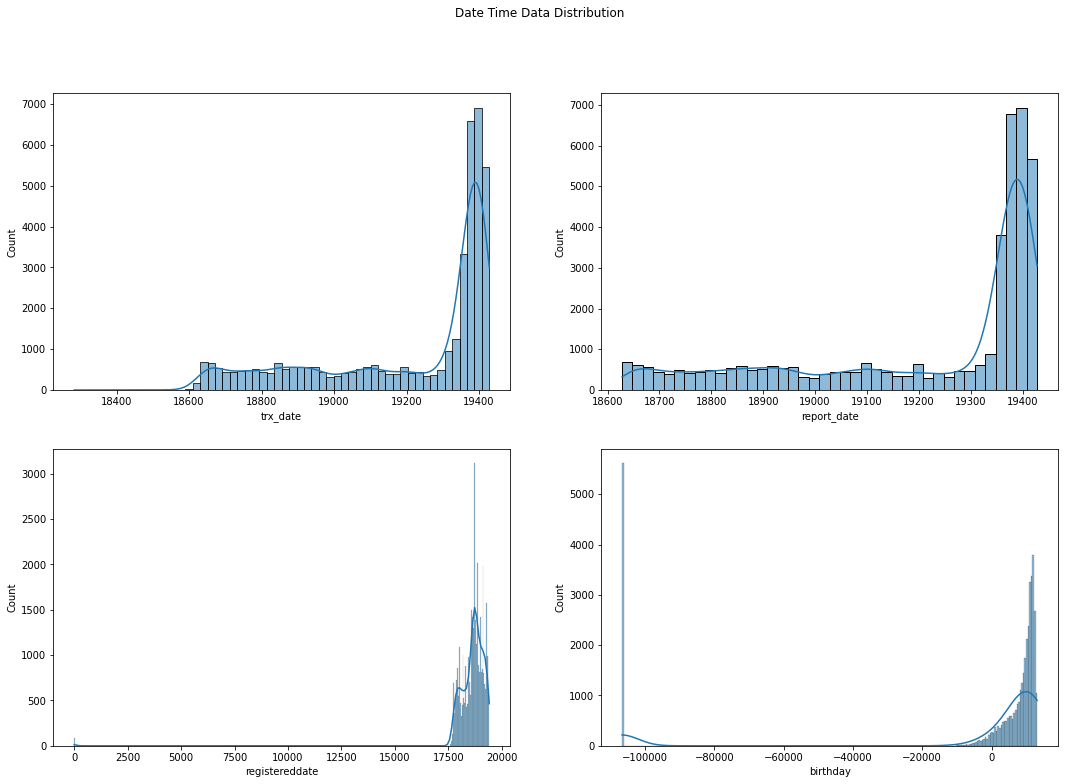

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

fig.suptitle('Date Time Data Distribution')

sns.histplot(ax=axes[0, 0], data=df['trx_date'], kde=True)
sns.histplot(ax=axes[0, 1], data=df['report_date'], kde=True)
sns.histplot(ax=axes[1, 0], data=df['registereddate'], kde=True)
sns.histplot(ax=axes[1, 1], data=df['birthday'], kde=True)

<AxesSubplot:xlabel='centrality_outdegree_sendmoney', ylabel='Count'>

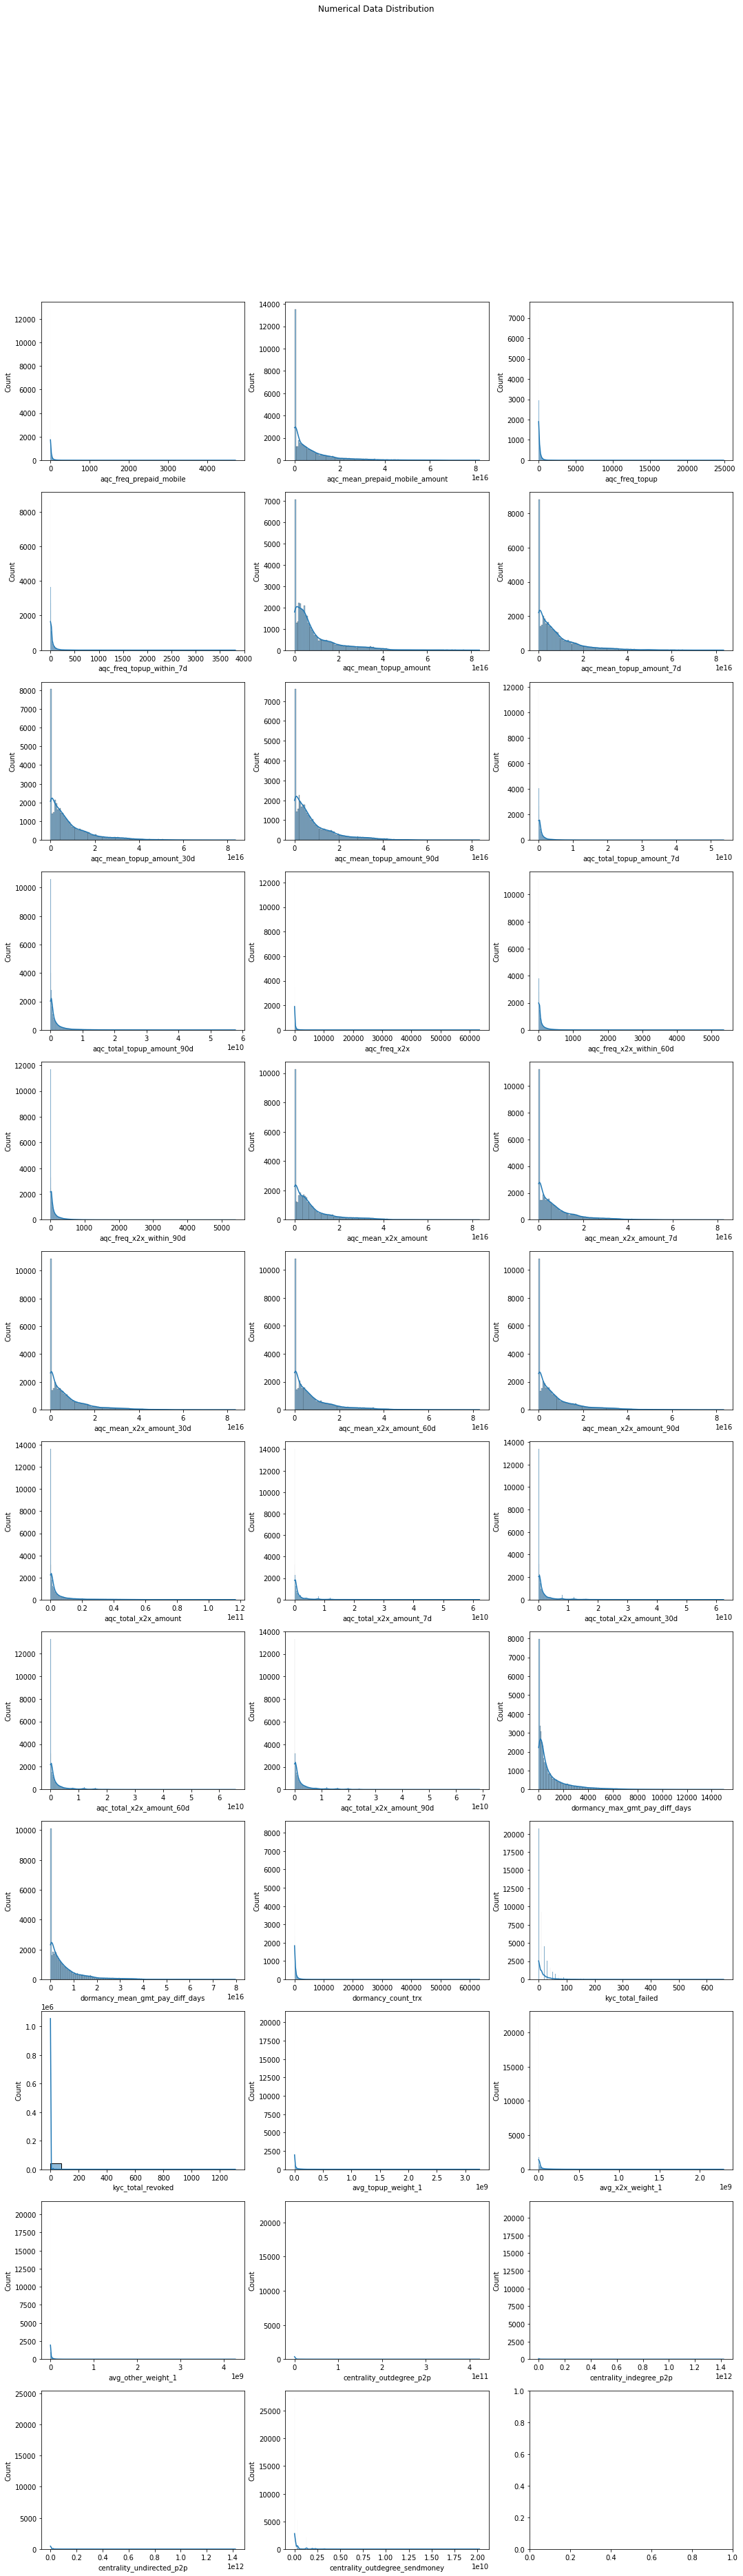

In [28]:
fig, axes = plt.subplots(12, 3, figsize=(18, 60))

fig.suptitle("Numerical Data Distribution")

sns.histplot(ax=axes[0, 0], data=df['aqc_freq_prepaid_mobile'], kde=True)
sns.histplot(ax=axes[0, 1], data=df['aqc_mean_prepaid_mobile_amount'], kde=True)
sns.histplot(ax=axes[0, 2], data=df['aqc_freq_topup'], kde=True)

sns.histplot(ax=axes[1, 0], data=df['aqc_freq_topup_within_7d'], kde=True)
sns.histplot(ax=axes[1, 1], data=df['aqc_mean_topup_amount'], kde=True)
sns.histplot(ax=axes[1, 2], data=df['aqc_mean_topup_amount_7d'], kde=True)

sns.histplot(ax=axes[2, 0], data=df['aqc_mean_topup_amount_30d'], kde=True)
sns.histplot(ax=axes[2, 1], data=df['aqc_mean_topup_amount_90d'], kde=True)
sns.histplot(ax=axes[2, 2], data=df['aqc_total_topup_amount_7d'], kde=True)

sns.histplot(ax=axes[3, 0], data=df['aqc_total_topup_amount_90d'], kde=True)
sns.histplot(ax=axes[3, 1], data=df['aqc_freq_x2x'], kde=True)
sns.histplot(ax=axes[3, 2], data=df['aqc_freq_x2x_within_60d'], kde=True)

sns.histplot(ax=axes[4, 0], data=df['aqc_freq_x2x_within_90d'], kde=True)
sns.histplot(ax=axes[4, 1], data=df['aqc_mean_x2x_amount'], kde=True)
sns.histplot(ax=axes[4, 2], data=df['aqc_mean_x2x_amount_7d'], kde=True)

sns.histplot(ax=axes[5, 0], data=df['aqc_mean_x2x_amount_30d'], kde=True)
sns.histplot(ax=axes[5, 1], data=df['aqc_mean_x2x_amount_60d'], kde=True)
sns.histplot(ax=axes[5, 2], data=df['aqc_mean_x2x_amount_90d'], kde=True)

sns.histplot(ax=axes[6, 0], data=df['aqc_total_x2x_amount'], kde=True)
sns.histplot(ax=axes[6, 1], data=df['aqc_total_x2x_amount_7d'], kde=True)
sns.histplot(ax=axes[6, 2], data=df['aqc_total_x2x_amount_30d'], kde=True)

sns.histplot(ax=axes[7, 0], data=df['aqc_total_x2x_amount_60d'], kde=True)
sns.histplot(ax=axes[7, 1], data=df['aqc_total_x2x_amount_90d'], kde=True)
sns.histplot(ax=axes[7, 2], data=df['dormancy_max_gmt_pay_diff_days'], kde=True)

sns.histplot(ax=axes[8, 0], data=df['dormancy_mean_gmt_pay_diff_days'], kde=True)
sns.histplot(ax=axes[8, 1], data=df['dormancy_count_trx'], kde=True)
sns.histplot(ax=axes[8, 2], data=df['kyc_total_failed'], kde=True)

sns.histplot(ax=axes[9, 0], data=df['kyc_total_revoked'], kde=True)
sns.histplot(ax=axes[9, 1], data=df['avg_topup_weight_1'], kde=True)
sns.histplot(ax=axes[9, 2], data=df['avg_x2x_weight_1'], kde=True)

sns.histplot(ax=axes[10, 0], data=df['avg_other_weight_1'], kde=True)
sns.histplot(ax=axes[10, 1], data=df['centrality_outdegree_p2p'], kde=True)
sns.histplot(ax=axes[10, 2], data=df['centrality_indegree_p2p'], kde=True)

sns.histplot(ax=axes[11, 0], data=df['centrality_undirected_p2p'], kde=True)
sns.histplot(ax=axes[11, 1], data=df['centrality_outdegree_sendmoney'], kde=True)

In [23]:
df1 = df.copy()

### Feature Clipping for Extreme Outliers
#### Promote a more Gaussian Distribution

[Text(0.5, 1.0, 'After')]

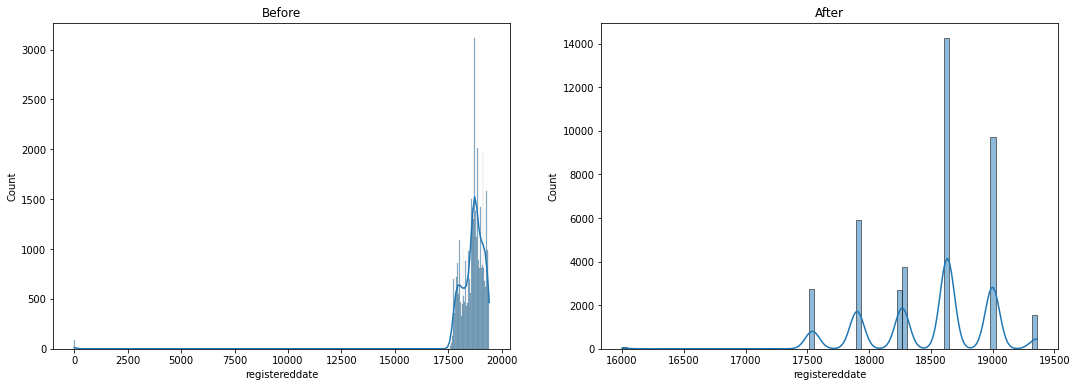

In [38]:
# Clipping 'registereddate' to (16000, 19360)
df1['registereddate'] = df1['registereddate'].clip(16000, 19360)

# Comparison
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(ax=axes[0], data=df['registereddate'], kde=True).set(title='Before')
sns.histplot(ax=axes[1], data=df1['registereddate'], kde=True).set(title='After')

[Text(0.5, 1.0, 'After')]

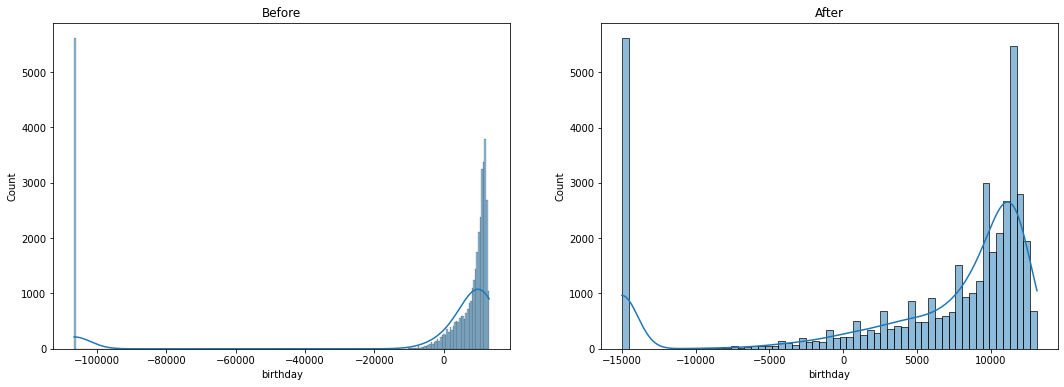

In [39]:
# Clipping 'birthday' to (-15000, 13149)
df1['birthday'] = df1['birthday'].clip(-15000, 13149)

# Comparison
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(ax=axes[0], data=df['birthday'], kde=True).set(title='Before')
sns.histplot(ax=axes[1], data=df1['birthday'], kde=True).set(title='After')

In [42]:
df1['report_date'].describe()

count    40717.000000
mean     19247.664022
std        278.108486
min      18628.000000
25%      19039.000000
50%      19374.000000
75%      19411.000000
max      19694.000000
Name: report_date, dtype: float64

In [43]:
# Clipping Other Numerical Data to .99th quantile
for i in range(6, 41):
    print(df1.columns[i] + " : " + str(int(df1[df1.columns[i]].quantile(.99))))
    df1[df1.columns[i]] = df1[df1.columns[i]].clip(0, int(df1[df1.columns[i]].quantile(.99)))

aqc_freq_prepaid_mobile : 257
aqc_mean_prepaid_mobile_amount : 50770559999999408
aqc_freq_topup : 1011
aqc_freq_topup_within_7d : 428
aqc_mean_topup_amount : 45970559999999408
aqc_mean_topup_amount_7d : 46500000000000000
aqc_mean_topup_amount_30d : 45600000000000000
aqc_mean_topup_amount_90d : 44700000000000000
aqc_total_topup_amount_7d : 13679684658
aqc_total_topup_amount_90d : 15905979146
aqc_freq_x2x : 1985
aqc_freq_x2x_within_60d : 823
aqc_freq_x2x_within_90d : 1067
aqc_mean_x2x_amount : 47370559999999408
aqc_mean_x2x_amount_7d : 45870559999999408
aqc_mean_x2x_amount_30d : 44500000000000000
aqc_mean_x2x_amount_60d : 43970559999999408
aqc_mean_x2x_amount_90d : 46170559999999408
aqc_total_x2x_amount : 42497161544
aqc_total_x2x_amount_7d : 15777597836
aqc_total_x2x_amount_30d : 16243754730
aqc_total_x2x_amount_60d : 19373406930
aqc_total_x2x_amount_90d : 20739702877
dormancy_max_gmt_pay_diff_days : 7790
dormancy_mean_gmt_pay_diff_days : 37100000000000000
dormancy_count_trx : 2977
kyc_

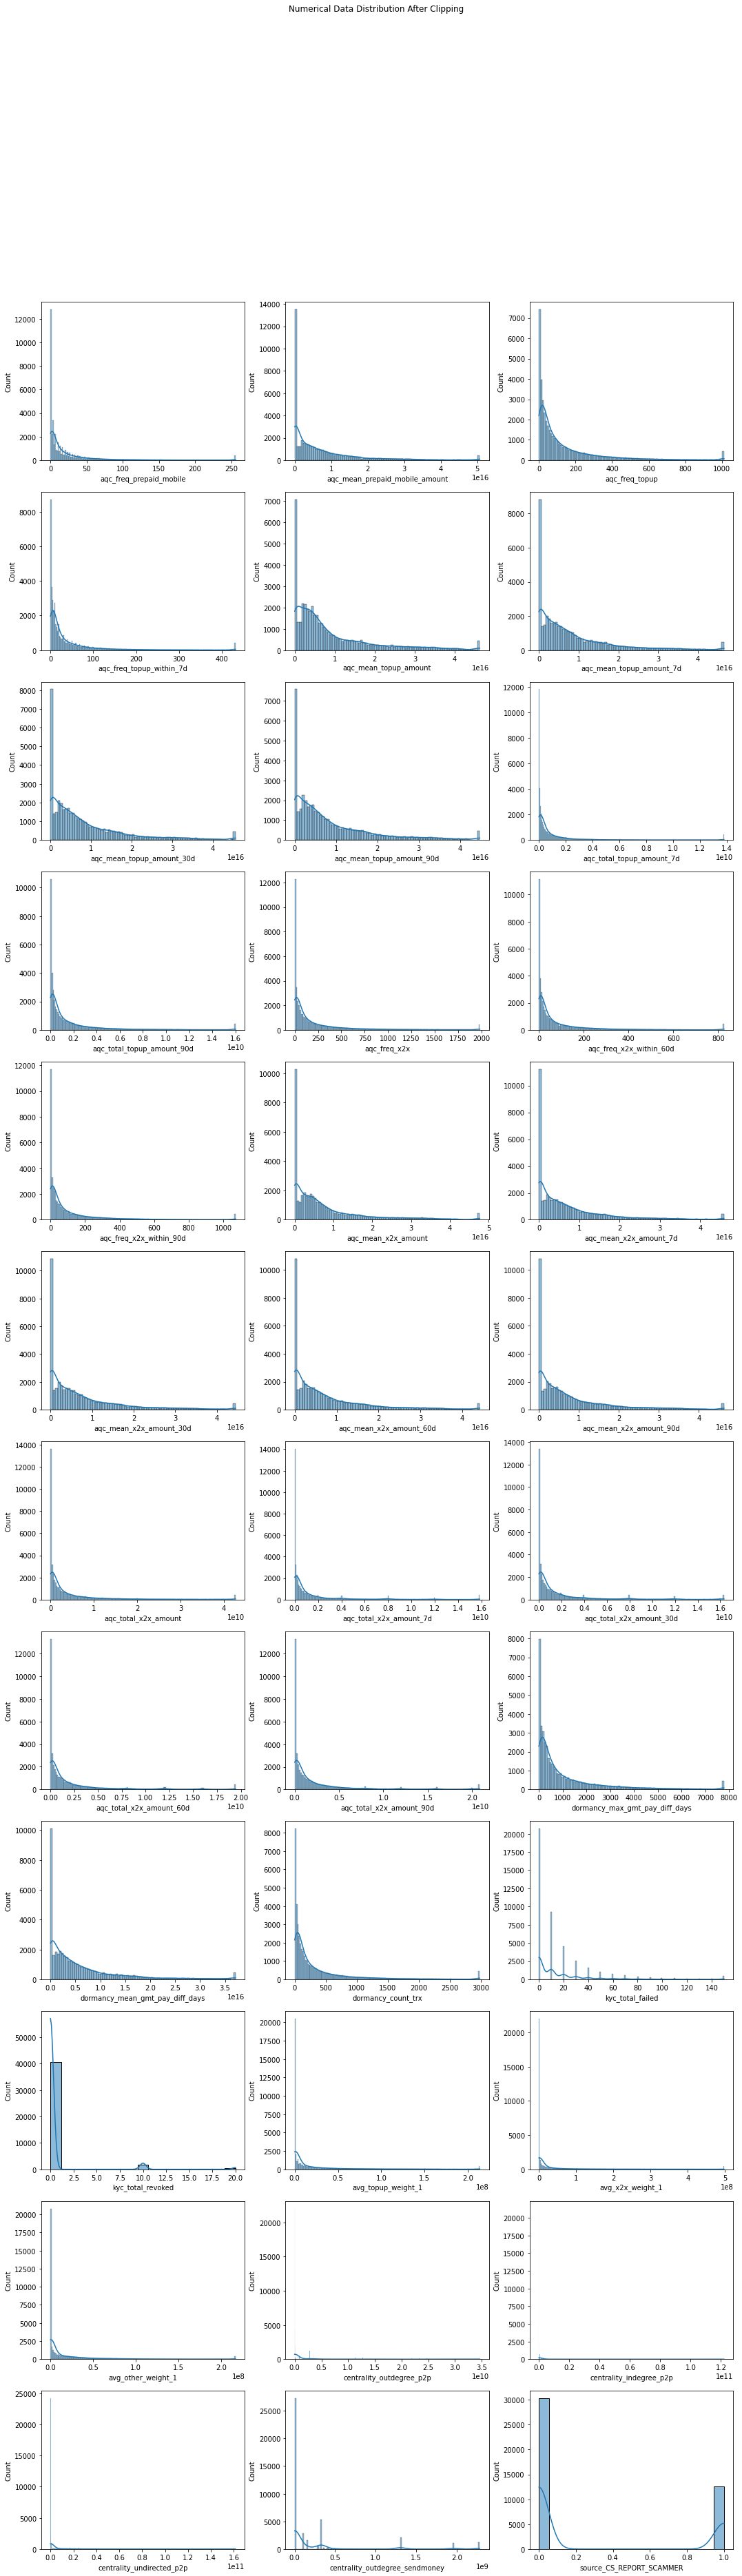

In [115]:
# After Clipping

fig, axes = plt.subplots(12, 3, figsize=(18, 60))

fig.suptitle("Numerical Data Distribution After Clipping")

n = 6
for i in range(0,12):
    for j in range(0,3):
        sns.histplot(ax=axes[i, j], data=df1[df1.columns[n]], kde=True)
        n += 1

### Normalisation

In [44]:
df2 = df1.copy()

<AxesSubplot:xlabel='birthday', ylabel='Count'>

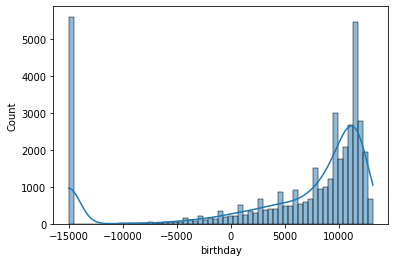

In [45]:
sns.histplot(df1['birthday'], kde=True)

In [46]:
# Min-max Normalisation for Every Non-Binary Features
# X_scaled = (X - X_min) / (X_max - X_min)
df2['trx_date'] = (df1['trx_date'] - df1['trx_date'].min()) / (df1['trx_date'].max() - df1['trx_date'].min())
df2['report_date'] = (df1['report_date'] - df1['report_date'].min()) / (df1['report_date'].max() - df1['report_date'].min())
df2['registereddate'] = (df1['registereddate'] - df1['registereddate'].min()) / (df1['registereddate'].max() - df1['registereddate'].min())
df2['birthday'] = (df1['birthday'] - df1['birthday'].min()) / (df1['birthday'].max() - df1['birthday'].min())

for i in range (6, 41):
    df2[df2.columns[i]] = (df1[df1.columns[i]] - df1[df1.columns[i]].min()) / (df1[df1.columns[i]].max() - df1[df1.columns[i]].min())

In [47]:
df2.to_csv("user_data_clip99_minmax.csv", sep=';')

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40717 entries, 0 to 40716
Data columns (total 57 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   is_scammer                           40717 non-null  int64  
 1   trx_date                             40717 non-null  float64
 2   report_date                          40717 non-null  float64
 3   registereddate                       40717 non-null  float64
 4   birthday                             40717 non-null  float64
 5   is_verified                          40717 non-null  int64  
 6   aqc_freq_prepaid_mobile              40717 non-null  float64
 7   aqc_mean_prepaid_mobile_amount       40717 non-null  float64
 8   aqc_freq_topup                       40717 non-null  float64
 9   aqc_freq_topup_within_7d             40717 non-null  float64
 10  aqc_mean_topup_amount                40717 non-null  float64
 11  aqc_mean_topup_amount_7d    

### Check Correlation after Normalisation

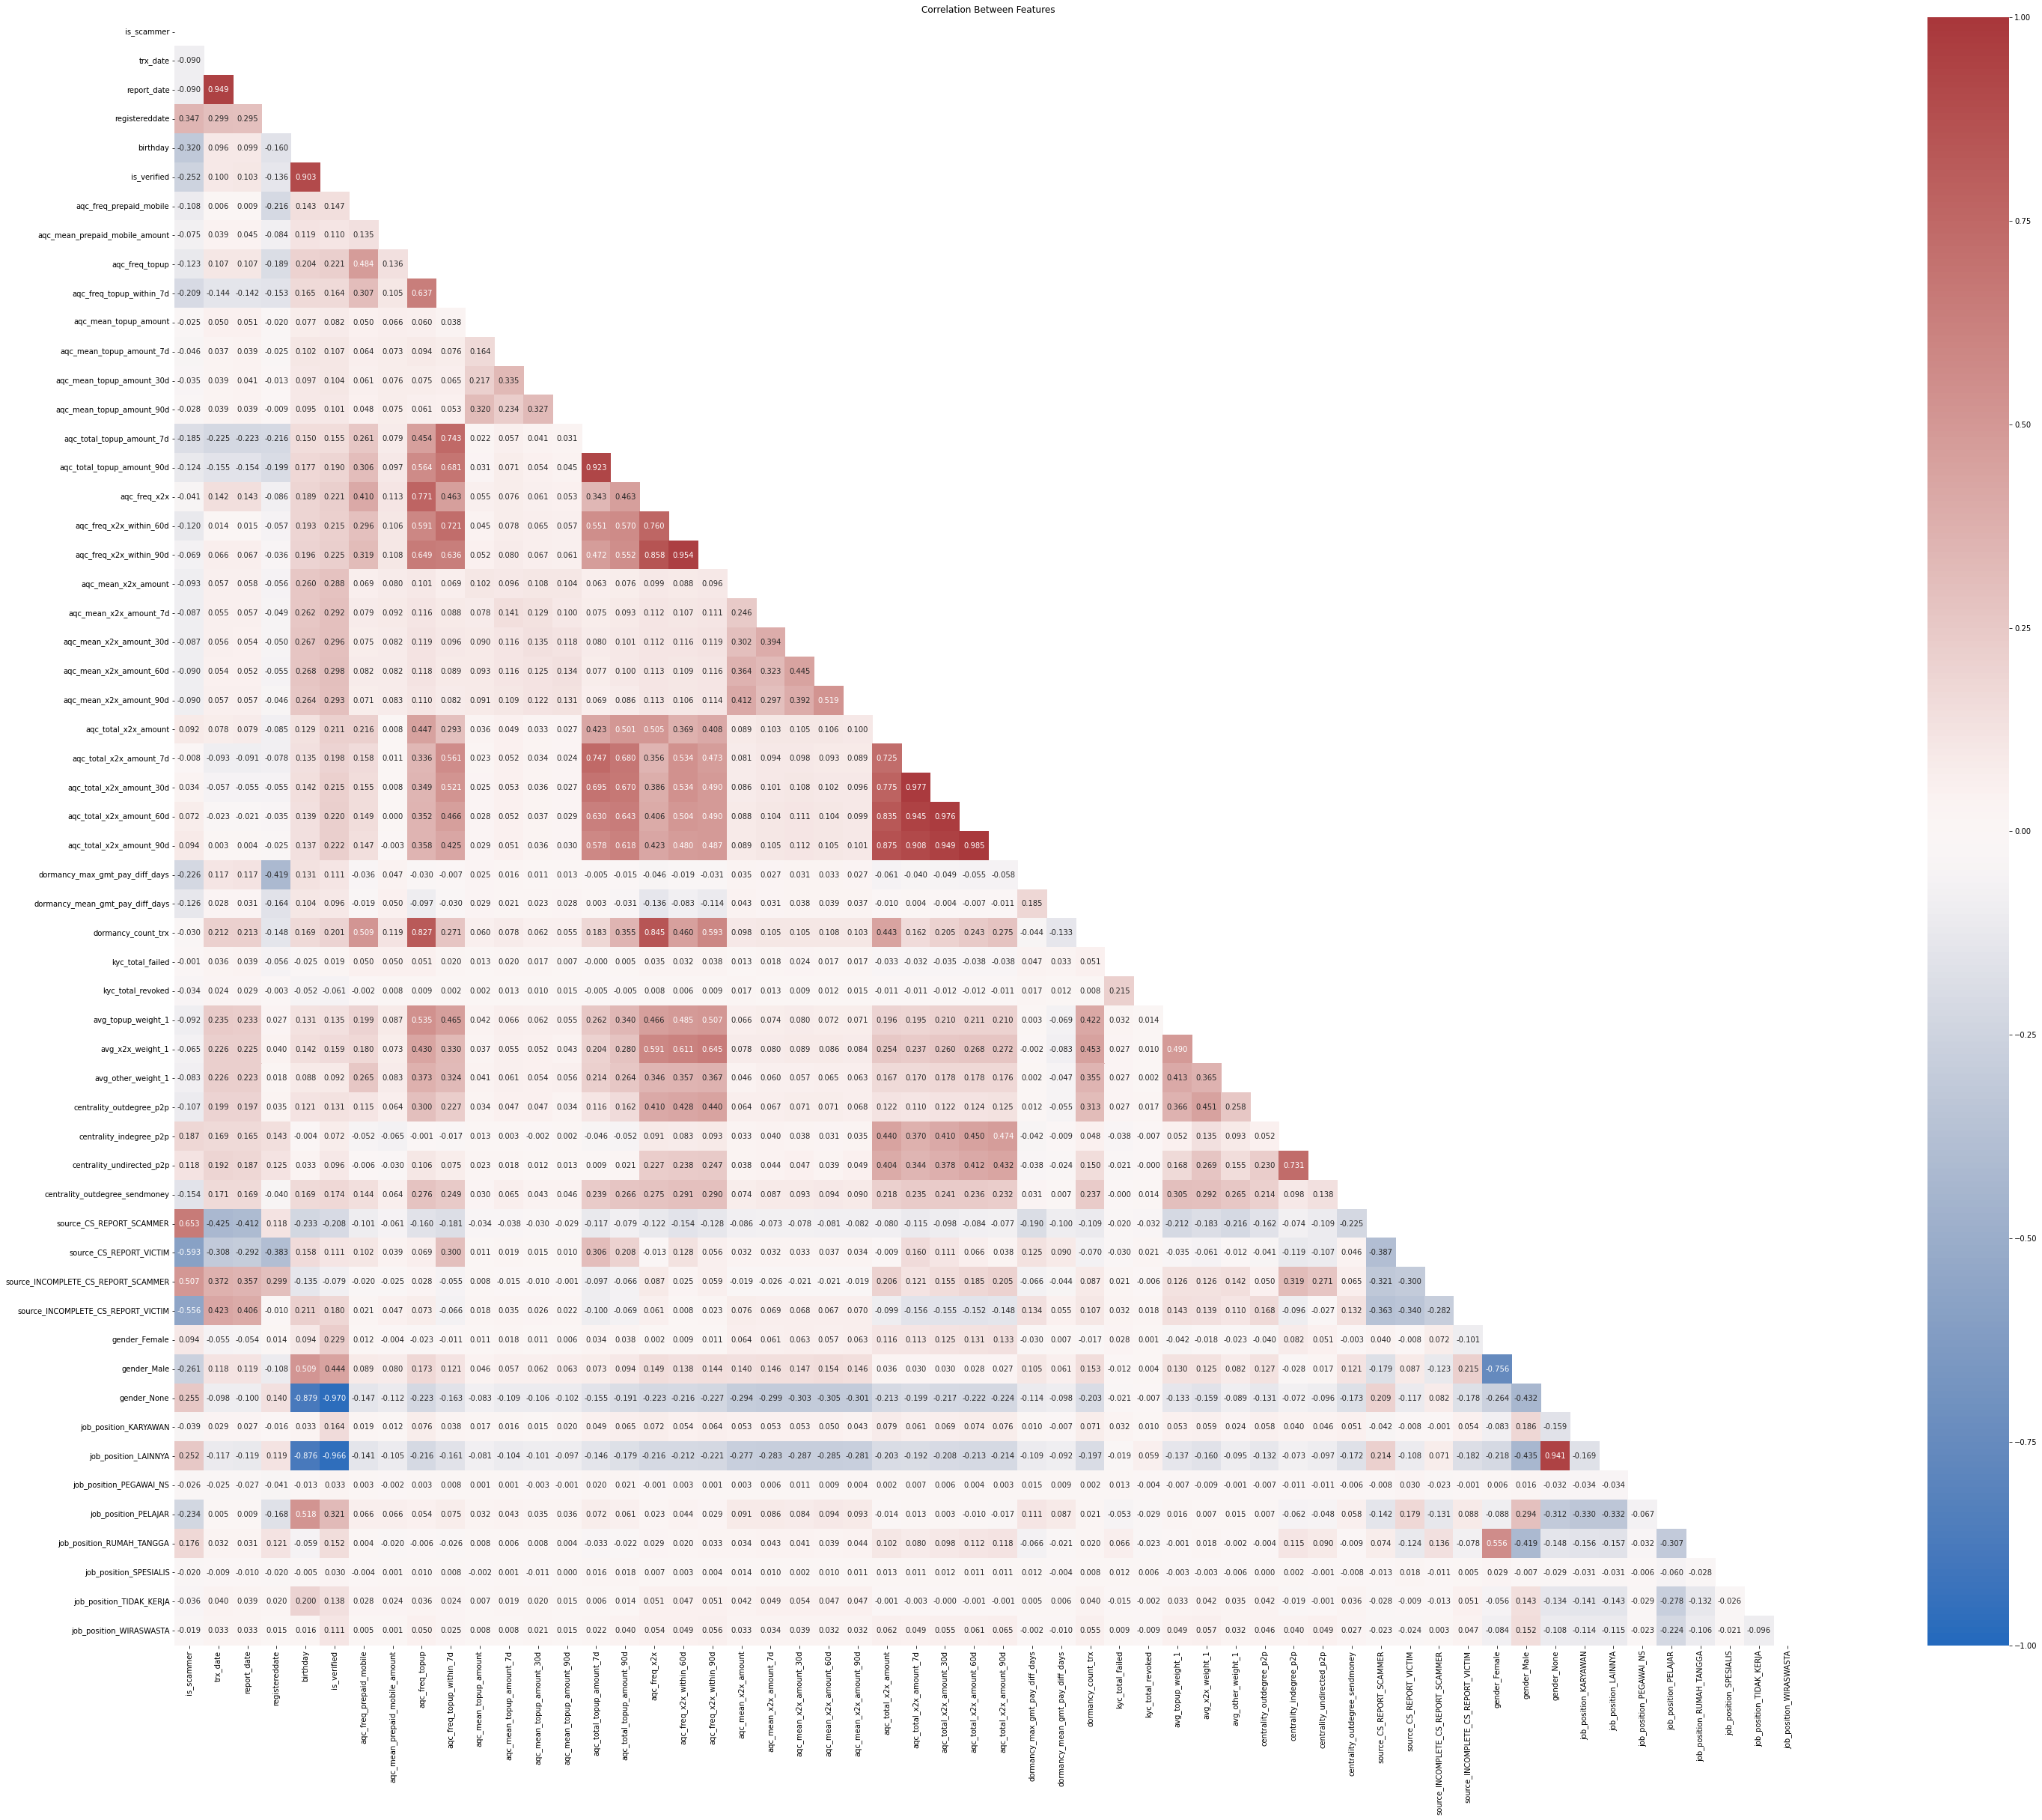

In [49]:
# Check Correlation of Features, then Make Relational Map
corr_column = df2.select_dtypes(include=[np.number]).columns.to_list()

fig = plt.figure(figsize=(60,40))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Features')

mask = np.triu(np.ones_like(
    df2[corr_column].corr(), dtype=np.bool))

sns.heatmap(df2[corr_column].corr(),
            vmin=-1, vmax=1, cmap='vlag', annot=True, fmt='.3f', mask=mask,
            annot_kws = {'fontsize': 10, 'fontweight':'roman'},
            square=True)

plt.show()

In [50]:
# Another Visual Representation
score_corr = df2[corr_column].corr()
score_corr.style.background_gradient(cmap='vlag')